# Ajuste de Oultiers
El presente notebook presenta un algoritmo para suavizar outliers en series temporales de variables ambientales. Se trabaja con los valores obtenidos por una red inalámbrica de sensores desplegada en un cultivo de cacao en una vereda del municipio de San Cayetano, Norte de Santander. Las mediciones analizadas corresponden a las variables Temperatura, Humedad Relativa, Humedad de la Tierra e Intensidad Lumínica.

### Importa los módulos necesarios y establece configuraciones

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


### Importa los registros de los nodos 2, 3 y 5 para el periodo 2

In [2]:
nodo = 2
periodo = 2
nodosp={}
for i in [2,3,5]:
    nodosp[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)
    nodosp[i] = nodosp[i].drop(columns=['HORA'])

### Grafica las mediciones de los tres nodos en gráficas separadas para cada variable

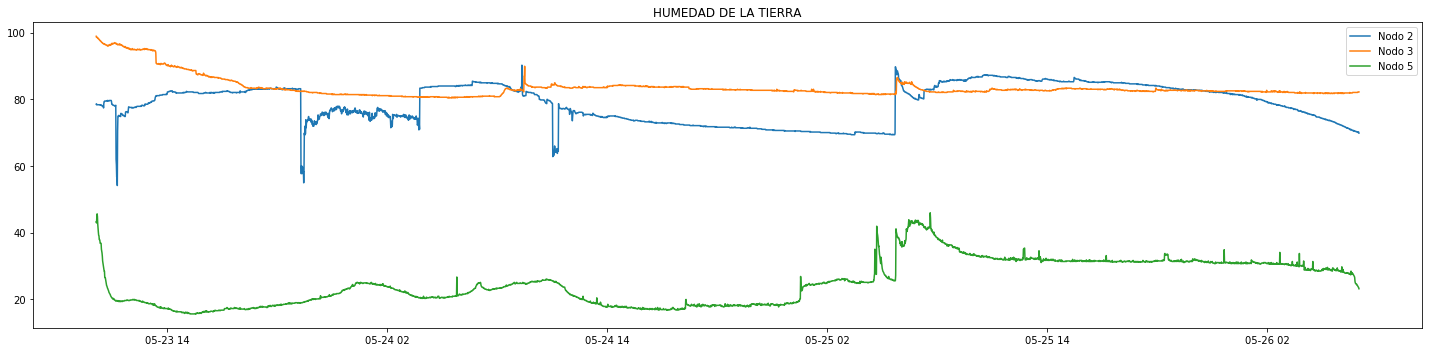

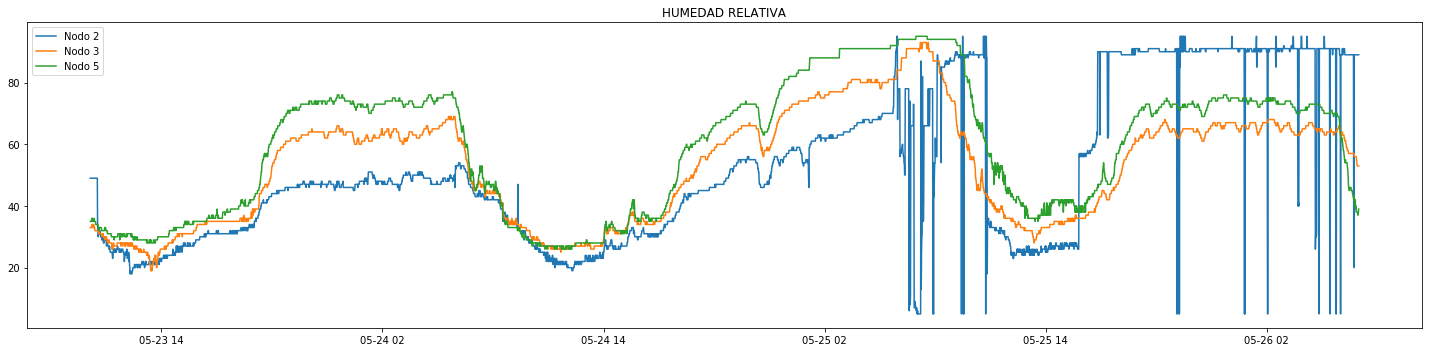

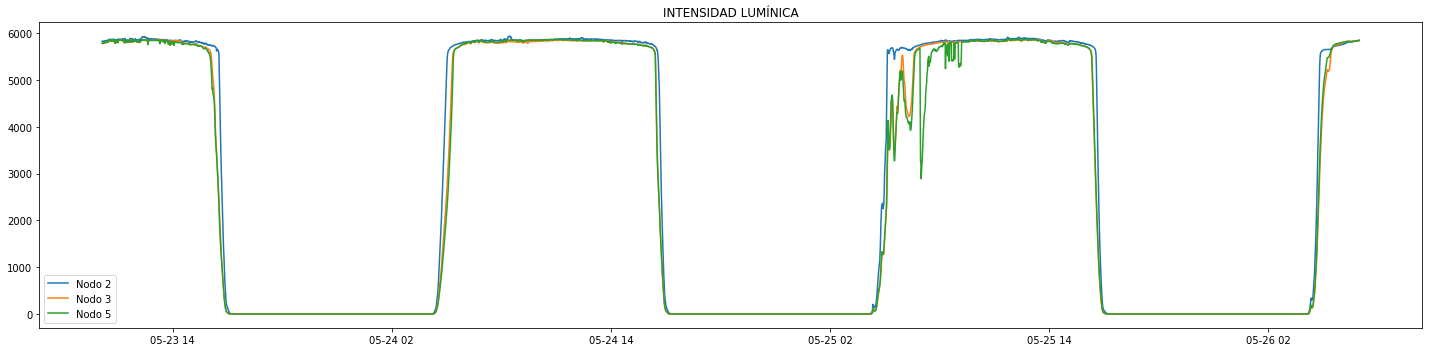

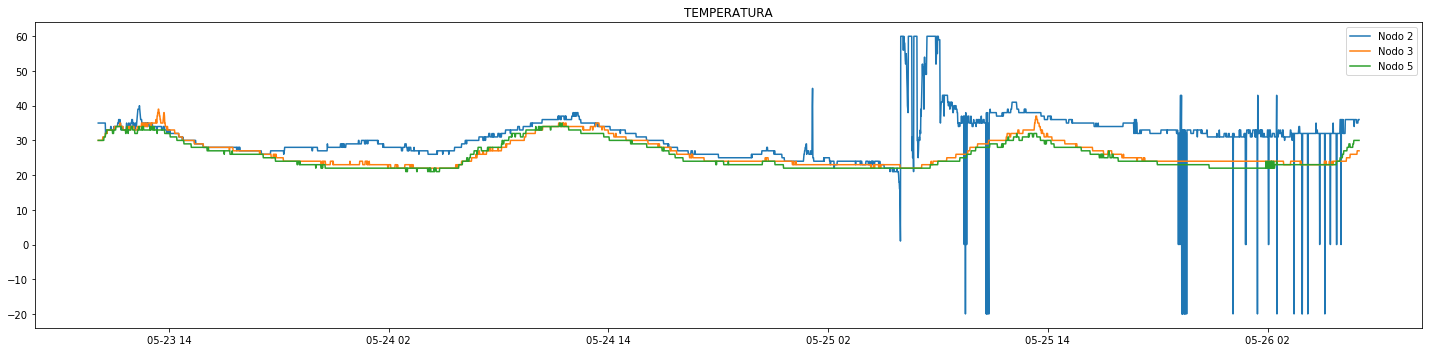

In [3]:
for i in range(4):
    plt.figure(figsize=[20,5])
    sub=510
    for n in nodosp:
        sub+=1
        plt.plot(nodosp[n].iloc[:,i],label='Nodo %d'%n)
        plt.title(nodosp[n].columns[i])
        plt.legend()
        plt.tight_layout()

### Se realizan copias del dataframe a analizar
- El llamado al módulo *funs* indica que la variable se se utiliza en funciones del módulo de manera global.

In [4]:
raw = nodosp[2]
funs.raw = raw.copy()
# filtrar para realzar un filtro de valores atípicos
# según un rango dundicado por teclado.
funs.filtrar = raw.copy()
# filtrado almacena almacenar el dataframe luego de aplicar filtro.
funs.filtrado = raw.copy() 
# Ajustado almacena el dataframe luego de aplicar el suavizado.
funs.ajustado = raw.copy()

### Grafica las variables temperatura y humedad de la tierra, el gráfico de dispersión de las dos variables y presenta la correlación entre las dos

<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.02$                     </center>

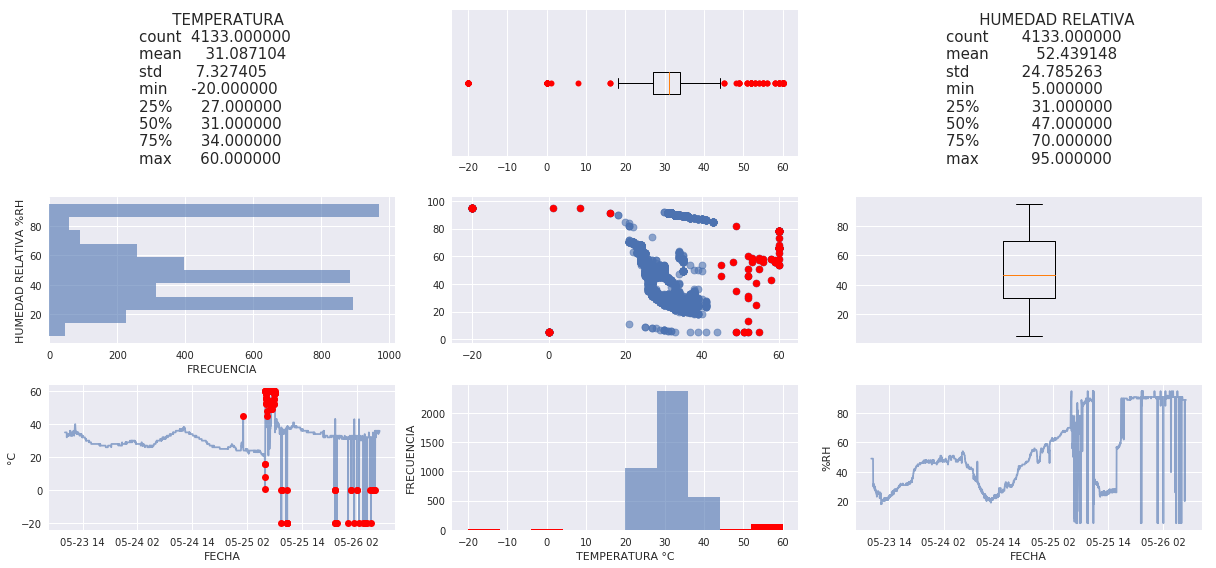

In [5]:
funs.info_relation(raw,'TEMPERATURA','HUMEDAD RELATIVA')

### Aplica un filtro de rango para los valores, basado en el criterio de Tukey y el rango de medición de los sensores

17 43


<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.06$                     </center>

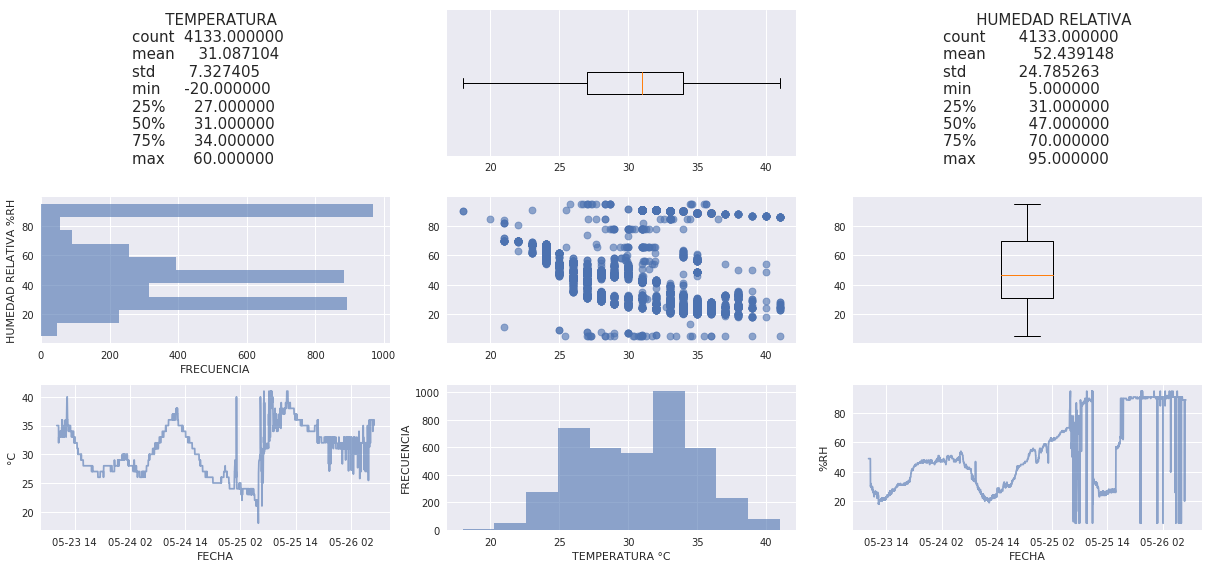

In [6]:
var1='TEMPERATURA'
var2='HUMEDAD RELATIVA'
lim_menor = funs.filtro_menor(var1,var2, 20, 43, -1)
lim_mayor = funs.filtro_mayor(var1,var2,20, 43, -1)
print(lim_menor,lim_mayor)
funs.filtrar_variables(var1,lim_menor,lim_mayor)
funs.info_relation(funs.filtrado,var1,var2)

17 43


<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.60$                     </center>

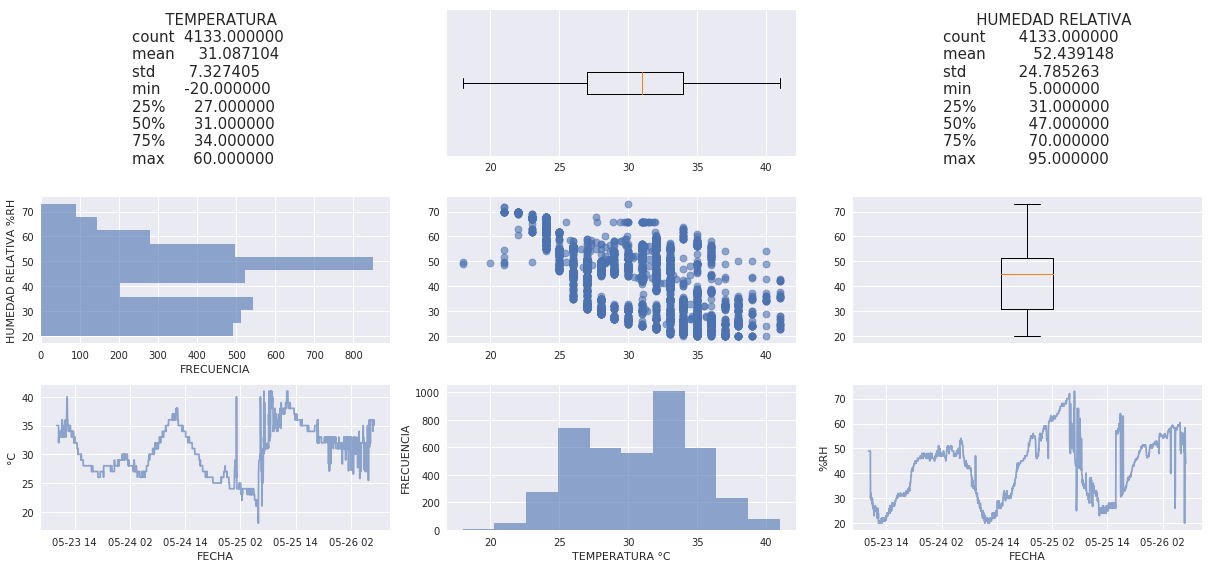

In [7]:
#lim_menor = funs.filtro_menor('HUMEDAD RELATIVA','TEMPERATURA', 19, 74, -1)
#lim_mayor = funs.filtro_mayor('HUMEDAD RELATIVA','TEMPERATURA',19, 74, -1)
print(lim_menor,lim_mayor)
funs.filtrar_variables('HUMEDAD RELATIVA',19,74)
funs.info_relation(funs.filtrado,'TEMPERATURA','HUMEDAD RELATIVA')

<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.60$                     </center>

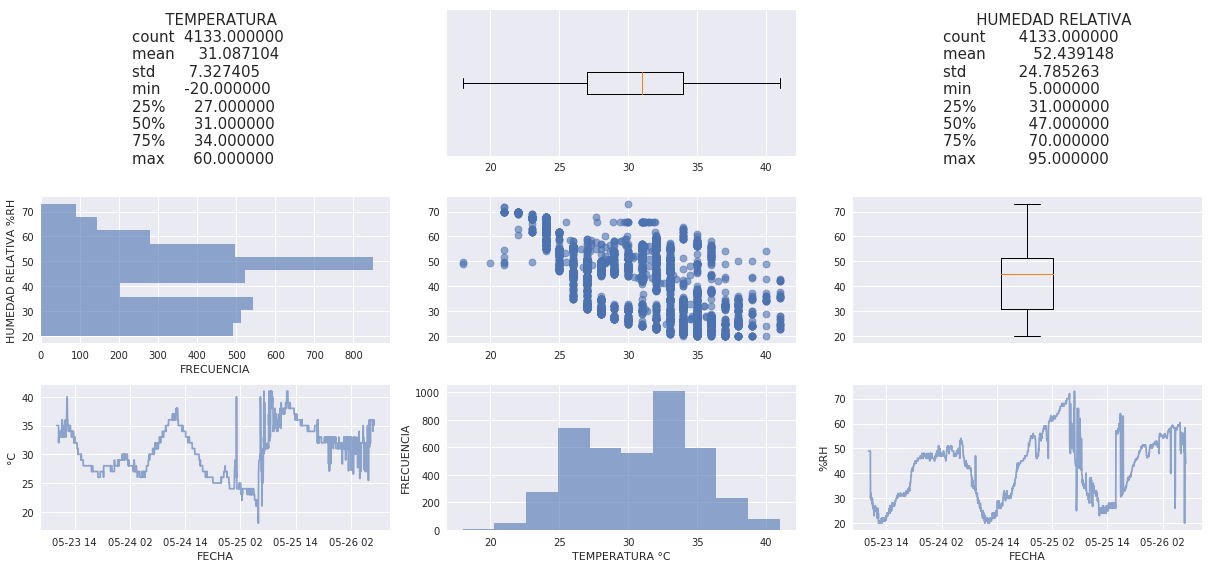

In [8]:
funs.info_relation(funs.filtrado,var1,var2)

17 43


<center>**GRÁFICOS DE                      HUMEDAD DE LA TIERRA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.33$                     </center>

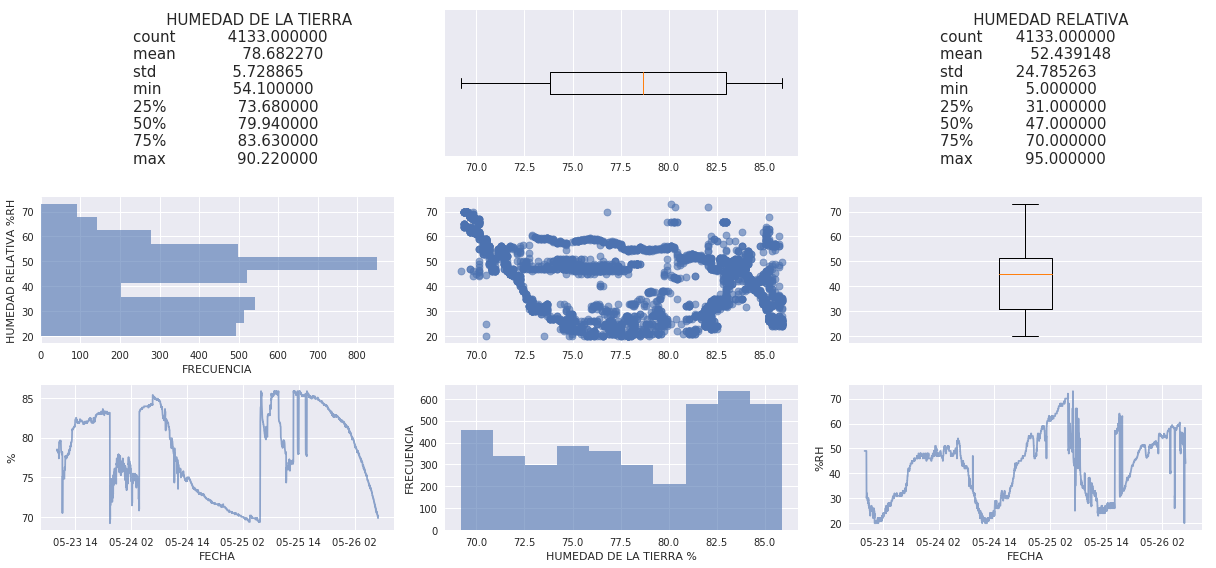

In [9]:
var1= 'HUMEDAD DE LA TIERRA'
var2= 'HUMEDAD RELATIVA'
#lim_menor = funs.filtro_menor(var2,var1, 68, 86, 1)
#lim_mayor = funs.filtro_mayor(var2,var1, 68, 86, 1)
print(lim_menor,lim_mayor)
funs.filtrar_variables(var1,68,86)
funs.info_relation(funs.filtrado,var1,var2)

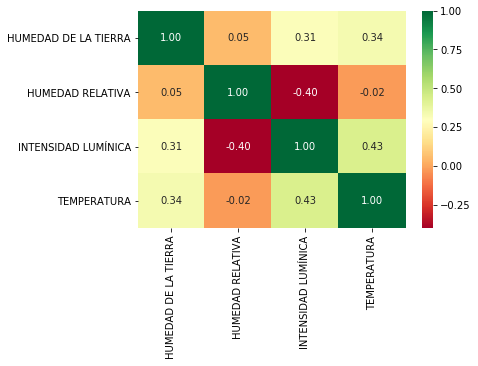

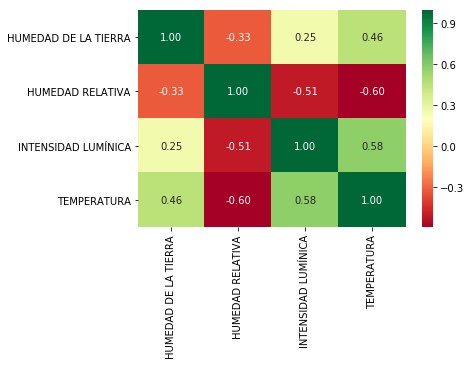

In [10]:
sns.heatmap(raw.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.figure()
sns.heatmap(funs.filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")

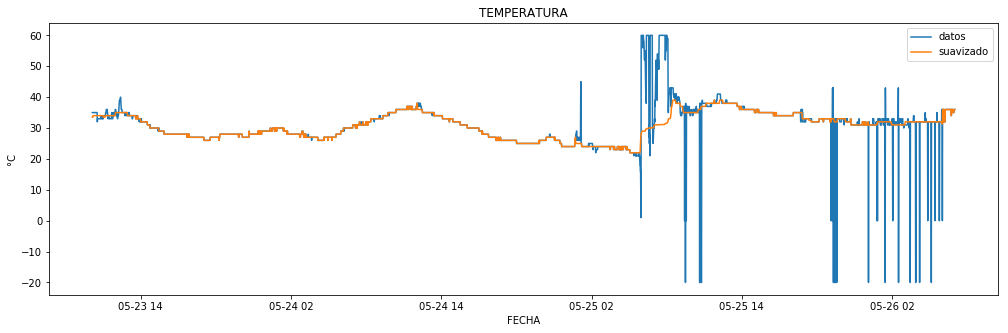

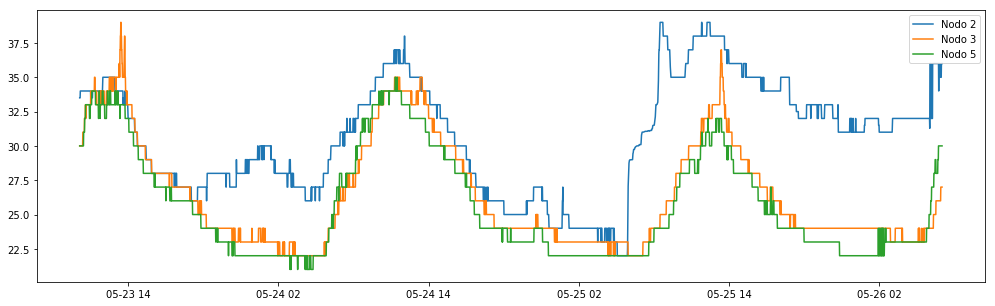

<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.06$                     </center>

<Figure size 432x288 with 0 Axes>

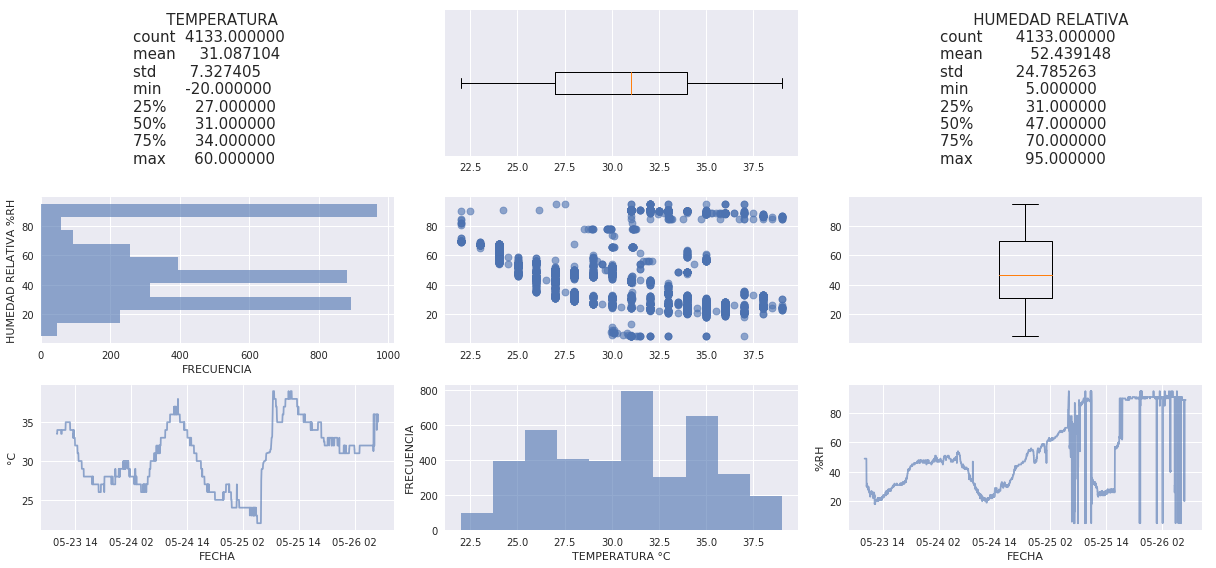

In [11]:
funs.ajuste_variacion('TEMPERATURA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,3],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,3],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,3],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA')

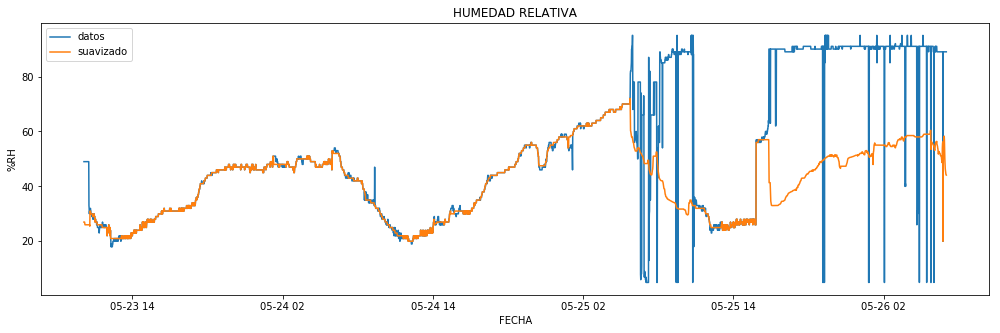

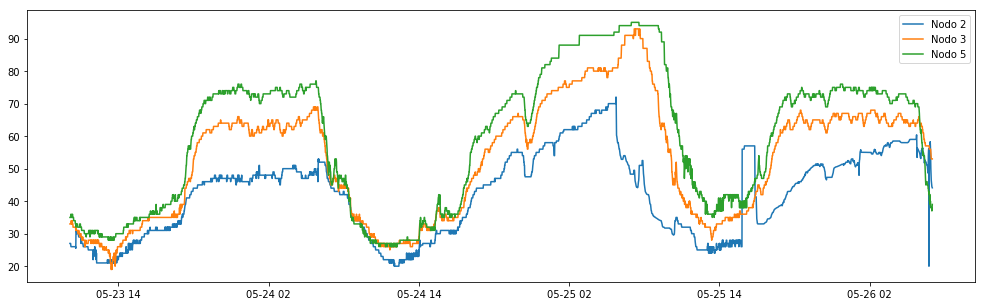

<center>**GRÁFICOS DE                      TEMPERATURA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.62$                     </center>

<Figure size 432x288 with 0 Axes>

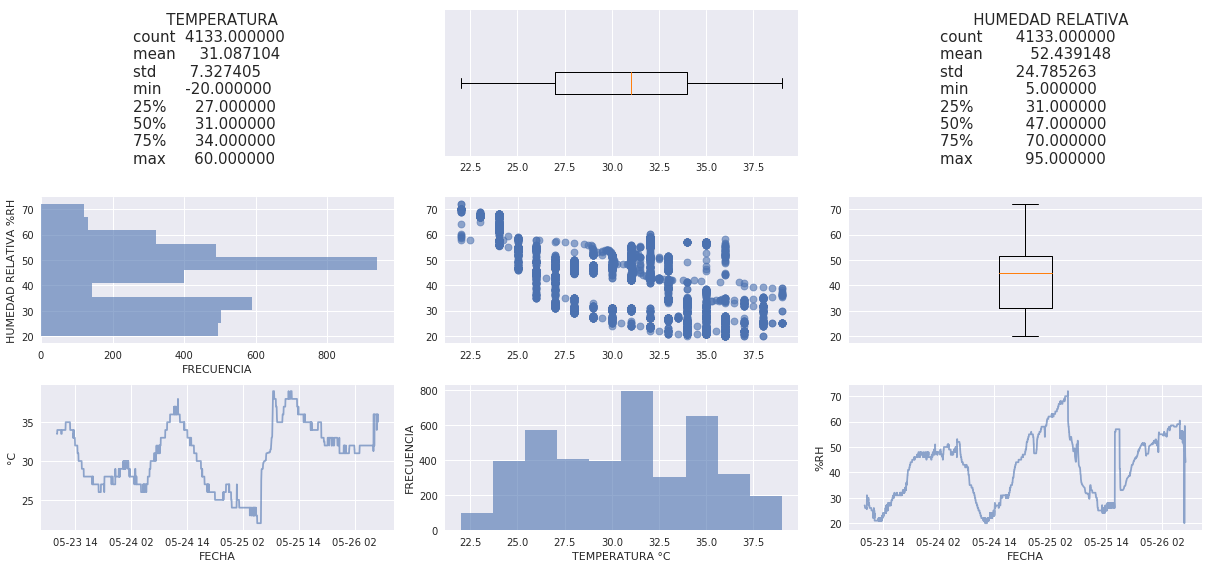

In [12]:
funs.ajuste_variacion('HUMEDAD RELATIVA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,1],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,1],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,1],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA')

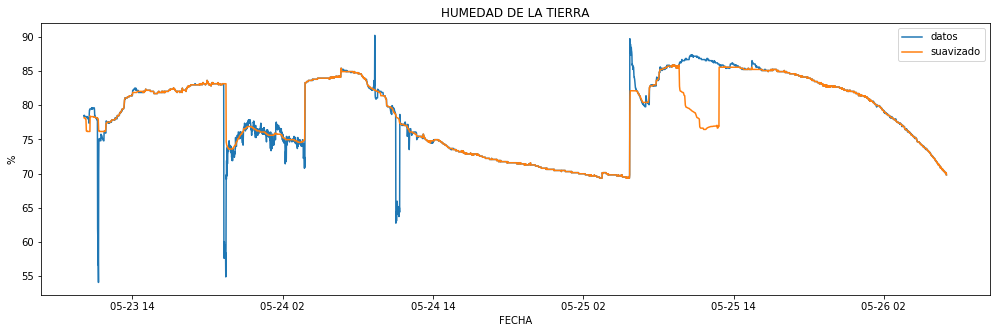

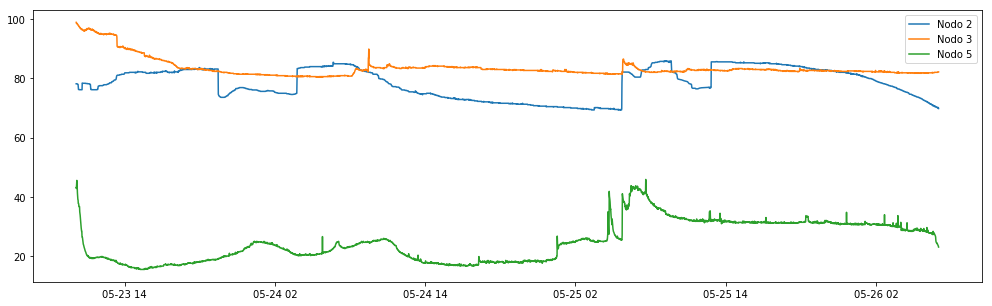

<center>**GRÁFICOS DE                      HUMEDAD DE LA TIERRA Y HUMEDAD RELATIVA**</center>

<center>$\rho = -0.36$                     </center>

<Figure size 432x288 with 0 Axes>

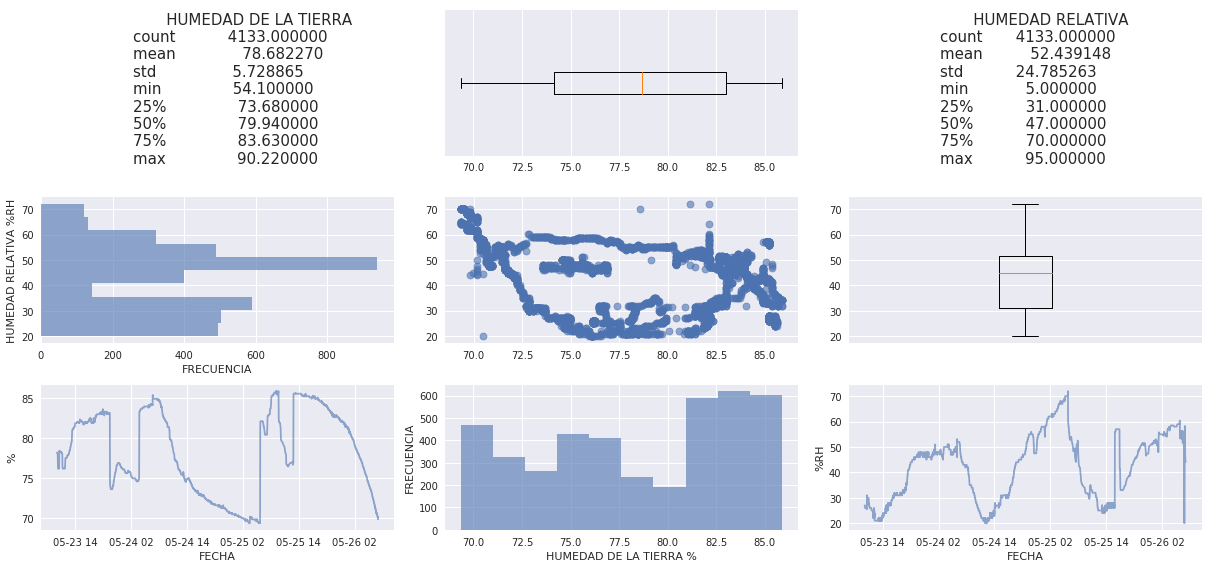

In [13]:
funs.ajuste_variacion('HUMEDAD DE LA TIERRA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,0],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,0],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,0],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'HUMEDAD DE LA TIERRA','HUMEDAD RELATIVA')

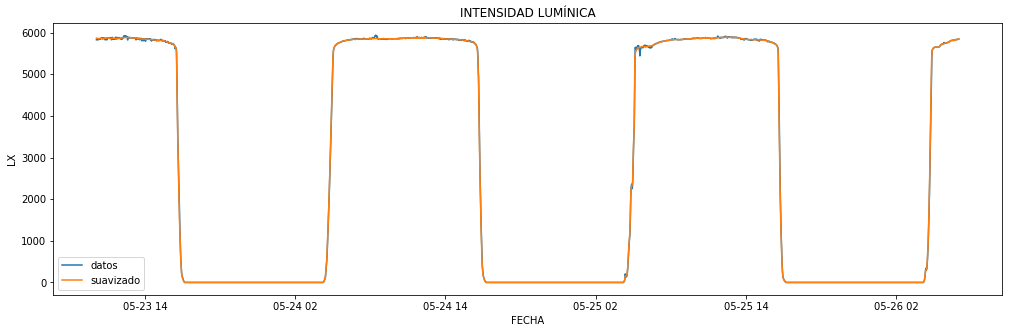

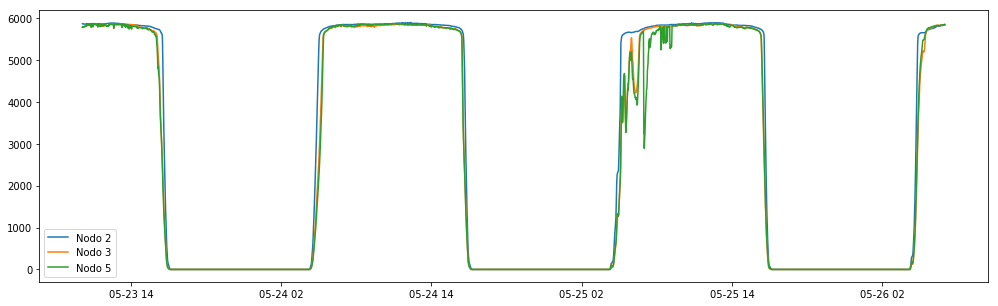

<center>**GRÁFICOS DE                      INTENSIDAD LUMÍNICA Y TEMPERATURA**</center>

<center>$\rho = 0.59$                     </center>

<Figure size 432x288 with 0 Axes>

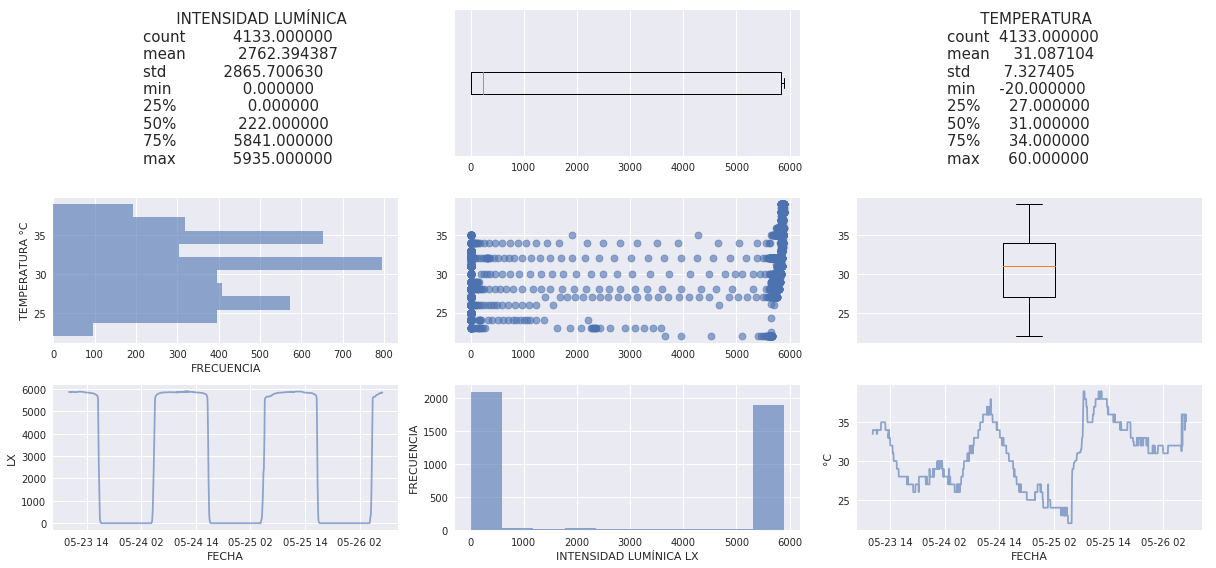

In [14]:
funs.ajuste_variacion('INTENSIDAD LUMÍNICA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,2],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,2],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,2],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'INTENSIDAD LUMÍNICA','TEMPERATURA')

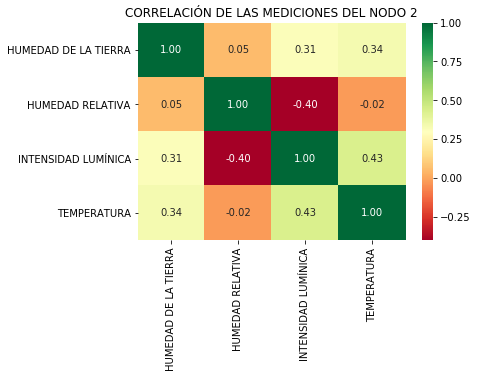

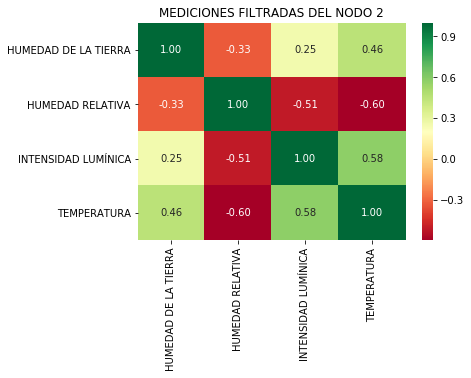

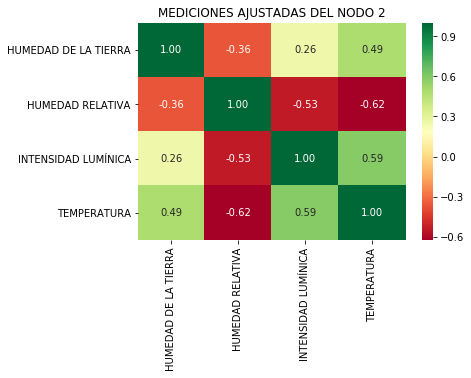

In [15]:
sns.heatmap(raw.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES FILTRADAS DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.ajustado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES AJUSTADAS DEL NODO %s' %nodo)
plt.show()

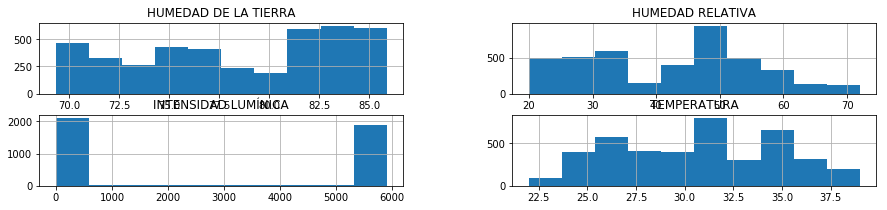

In [16]:
funs.ajustado.hist(figsize=[15,3])
plt.show()